## Computation on Arrays: Broadcasting

### Introducing Broadcasting
Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:



In [1]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [2]:
a+5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array a is stretched, or broadcast across the second dimension in order to match the shape of M.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [6]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* `a` and `b` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure. 
![alt text](02.05-broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.


## Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1
Let's look at adding a two-dimensional array to a one-dimensional array:

In [7]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays, which have the following shapes:

- `M.shape` is `(2, 3)`
- `a.shape` is `(3,)`

We see by rule 1 that the array `a` has fewer dimensions, so we pad it on the left with ones:

- `M.shape` remains `(2, 3)`
- `a.shape` becomes `(1, 3)`

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- `M.shape` remains `(2, 3)`
- `a.shape` becomes `(2, 3)`

The shapes now match, and we see that the final shape will be `(2, 3)`:

In [8]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

## Broadcasting Example 2
Now let's take a look at an example where both arrays need to be broadcast:

In [9]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by determining the shapes of the arrays:

- `a.shape` is `(3, 1)`
- `b.shape` is `(3,)`

Rule 1 says we must pad the shape of `b` with ones:

- `a.shape` remains `(3, 1)`
- `b.shape` becomes `(1, 3)`

And rule 2 tells us that we must upgrade each of these ``1``s to match the corresponding size of the other array:

- `a.shape` becomes `(3, 3)`
- `b.shape` becomes `(3, 3)`

Because the results match, these shapes are compatible. We can see this here:

In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3
Now let's take a look at an example in which the two arrays are not compatible:

In [11]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix `M` is transposed.
How does this affect the calculation? The shapes of the arrays are as follows:

- `M.shape` is `(3, 2)`
- `a.shape` is `(3,)`

Again, rule 1 tells us that we must pad the shape of `a` with ones:

- `M.shape` remains `(3, 2)`
- `a.shape` becomes `(1, 3)`

By rule 2, the first dimension of `a` is then stretched to match that of `M`:

- `M.shape` remains `(3, 2)`
- `a.shape` becomes `(3, 3)`

Now we hit rule 3—the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [12]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine making `a` and `M` compatible by, say, padding `a`'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.



In [13]:
a[:, np.newaxis].shape

(3, 1)

In [14]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Also note that while we've been focusing on the + operator here, these broadcasting rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach:

In [15]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### Broadcasting in Practice
Broadcasting operations form the core of many examples we'll see throughout this book. We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array
In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability. One commonly seen example is when centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values. 

In [16]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the mean aggregate across the first dimension:

In [17]:
Xmean = X.mean(0)
Xmean

array([0.51155259, 0.58340413, 0.55886022])

And now we can center the X array by subtracting the mean (this is a broadcasting operation):

In [18]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [19]:
X_centered.mean(0)

array([-7.77156117e-17, -5.55111512e-17, -8.88178420e-17])

Plotting a two-dimensional function
One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function $z=f(x,y)$, broadcasting can be used to compute the function across the grid:

In [20]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

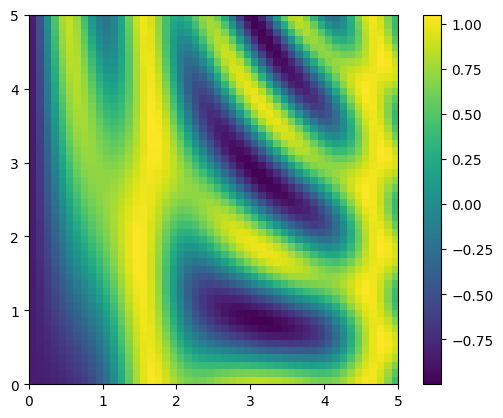

In [22]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

#### Example: Counting Rainy Days
Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas

In [23]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

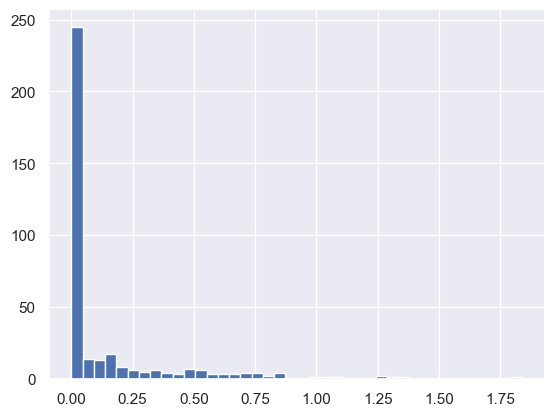

In [25]:
plt.hist(inches, 40);

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. But this doesn't do a good job of conveying some information we'd like to see: for example, how many rainy days were there in the year? What is the average precipitation on those rainy days? How many days were there with more than half an inch of rain?

### Digging into the data
One approach to this would be to answer these questions by hand: loop through the data, incrementing a counter each time we see values in some desired range. For reasons discussed throughout this chapter, such an approach is very inefficient, both from the standpoint of time writing code and time computing the result. We saw in Computation on NumPy Arrays: Universal Functions that NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arrays; in the same way, we can use other ufuncs to do element-wise comparisons over arrays, and we can then manipulate the results to answer the questions we have. We'll leave the data aside for right now, and discuss some general tools in NumPy to use masking to quickly answer these types of questions.

### Comparison Operators as ufuncs
In Computation on NumPy Arrays: Universal Functions we introduced ufuncs, and focused in particular on arithmetic operators. We saw that using +, -, *, /, and others on arrays leads to element-wise operations. NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations are available:

In [28]:
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than
print(x < 3)
x > 3  # greater than
print(x > 3)
x <= 3  # less than or equal
print(x <= 3)
x >= 3  # greater than or equal
print(x >= 3)
x != 3  # not equal
print(x != 3)
x == 3  # equal
print(x == 3)


[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [29]:
(2 * x) == (x ** 2)


array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write `x < 3`, internally NumPy uses `np.less(x, 3)`.
    A summary of the comparison operators and their equivalent ufuncs is shown here:

| Operator    | Equivalent ufunc  | Operator   | Equivalent ufunc |
|-------------|-------------------|------------|------------------|
|`==`         |`np.equal`         |`!=`        |`np.not_equal`    |
|`<`          |`np.less`          |`<=`        |`np.less_equal`   |
|`>`          |`np.greater`       |`>=`        |`np.greater_equal`|

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. Here is a two-dimensional example:

In [30]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [31]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

### Working with Boolean Arrays
Given a Boolean array, there are a host of useful operations you can do. We'll work with x, the two-dimensional array we created earlier.



## Counting entries
To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [32]:
# how many values less than 6?
np.count_nonzero(x < 6)

np.int64(8)

We see that there are eight array entries that are less than 6. Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

In [33]:
np.sum(x < 6)

np.int64(8)

The benefit of sum() is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [34]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) np.any or np.all:

In [36]:
# are there any values greater than 8?
np.any(x > 8)
print(np.any(x > 8))
# are there any values less than zero?
np.any(x < 0)
print(np.any(x < 0))
# are all values less than 10?
np.all(x < 10)
print(np.all(x < 10))
# are all values equal to 3?
np.all(x == 3)
print(np.all(x == 3))

True
False
True
False


In [37]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

Note:
Python has built-in sum(), any(), and all() functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using np.sum(), np.any(), and np.all() for these examples!

## Boolean operators
We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches. But what if we want to know about all days with rain less than four inches and greater than one inch? This is accomplished through Python's bitwise logic operators, &, |, ^, and ~. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [38]:
np.sum((inches > 0.5) & (inches < 1))


np.int64(29)

So we see that there are 29 days with rainfall between 0.5 and 1.0 inches.

Note that the parentheses here are important–because of operator precedence rules, with parentheses removed this expression would be evaluated as follows, which results in an error:

In [39]:
inches > (0.5 & inches) < 1

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Using the equivalence of A AND B and NOT (NOT A OR NOT B) (which you may remember if you've taken an introductory logic course), we can compute the same result in a different manner:

In [40]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

np.int64(29)

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator    | Equivalent ufunc  | Operator    | Equivalent ufunc  |
|-------------|-------------------|-------------|-------------------|
|`&`          |`np.bitwise_and`   |&#124;       |`np.bitwise_or`    |
|`^`          |`np.bitwise_xor`   |`~`          |`np.bitwise_not`   |

Using these tools, we can start to answer many of the questions we might have about our weather data.
Here are some examples of results we can compute when combining masking with aggregations:

In [41]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


### Boolean Arrays as Masks
In the preceding section we looked at aggregates computed directly on Boolean arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our x array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [42]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

We can obtain a Boolean array for this condition easily, as we've already seen:

In [43]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

In [44]:
x[x < 5]

array([0, 3, 3, 3, 2, 4], dtype=int32)

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is True.

We are then free to operate on these values as we wish. For example, we can compute some relevant statistics on our Seattle rain data:

In [45]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


### Aside: Using the Keywords and/or Versus the Operators &/|
One common point of confusion is the difference between the keywords and and or on one hand, and the operators & and | on the other hand. When would you use one versus the other?

The difference is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.

When you use and or or, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True. Thus:

In [46]:
bool(42), bool(0)
print(bool(42), bool(0))
bool(42 and 0)
print(bool(42 and 0))
bool(42 or 0)
print(bool(42 or 0))

True False
False
True


In [47]:
bin(42)

'0b101010'

In [48]:
bin(59)

'0b111011'

In [49]:
bin(42 | 59)

'0b111011'

In [50]:

bin(42 & 59)

'0b101010'

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = True and 0 = False, and the result of & and | operates similarly to above:

In [51]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Using or on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [52]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use | or & rather than or or and:

In [53]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

Trying to evaluate the truth or falsehood of the entire array will give the same ValueError we saw previously:

In [54]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

### Fancy Indexing

#### Exploring Fancy Indexing
Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [55]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [57]:
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [58]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60], dtype=int32)

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [59]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

Fancy indexing also works in multiple dimensions. Consider the following array:

In [60]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [61]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]. The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in Computation on Arrays: Broadcasting. So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [62]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations. For example:

In [63]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing
For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [ ]:
print(X)



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [66]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [67]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [68]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Example: Selecting Random Points
One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an N
 by D
 matrix representing N
 points in D
 dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [69]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

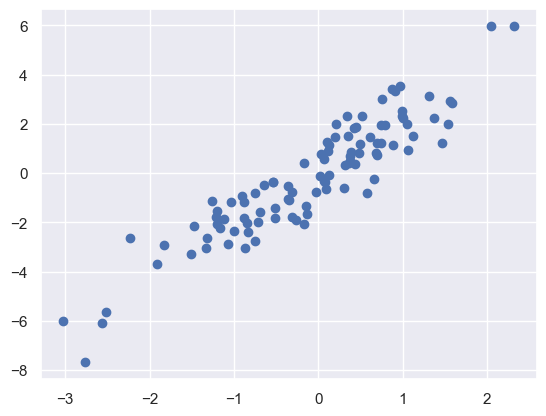

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [71]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([79, 51, 61, 96, 84, 80, 24, 14, 11, 55, 58, 48, 82,  3, 27, 99, 30,
       25, 13,  5], dtype=int32)

In [72]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

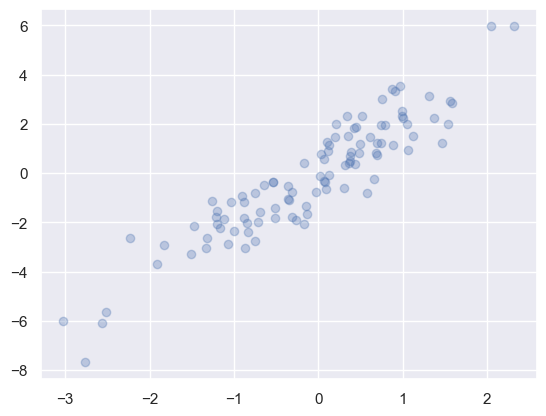

In [74]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models

## Modifying Values with Fancy Indexing
Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [76]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [77]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [78]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

Fair enough, but consider this operation:

In [79]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the at() method of ufuncs (available since NumPy 1.8), and do the following:

In [80]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The at() method does an in-place application of the given operator at the specified indices (here, i) with the specified value (here, 1). Another method that is similar in spirit is the reduceat() method of ufuncs, which you can read about in the NumPy documentation.

### Example: Binning Data
You can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins. We could compute it using ufunc.at like this:

In [83]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

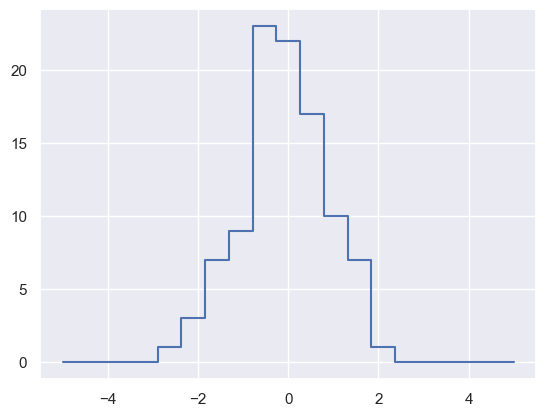

In [85]:
# plot the results
plt.step(bins, counts);

Of course, it would be silly to have to do this each time you want to plot a histogram. This is why Matplotlib provides the plt.hist() routine, which does the same in a single line:

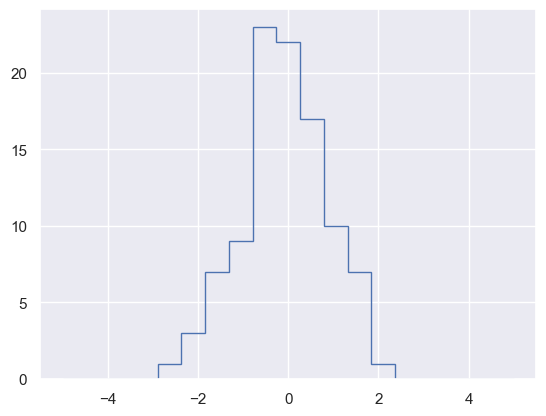

In [86]:
plt.hist(x, bins, histtype='step');


This function will create a nearly identical plot to the one seen here. To compute the binning, matplotlib uses the np.histogram function, which does a very similar computation to what we did before. Let's compare the two here:

In [87]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
34.3 μs ± 16.6 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
22.3 μs ± 12 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be? If you dig into the np.histogram source code (you can do this in IPython by typing np.histogram??), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [88]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
22.8 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
283 ms ± 86.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see Big-O Notation). But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors. The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like np.histogram and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

### Sorting Arrays
For example, a simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [89]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [90]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays. For a list of N
 values, it requires N
 loops, each of which does on order ∼N
 comparisons to find the swap value. In terms of the "big-O" notation often used to characterize these algorithms (see Big-O Notation), selection sort averages O[N2]
: if you double the number of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the bogosort:

In [91]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [92]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted. With an average scaling of O[N×N!]
, (that's N times N factorial) this should–quite obviously–never be used for any real computation.

Fortunately, Python contains built-in sorting algorithms that are much more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

### Fast Sorting in NumPy: np.sort and np.argsort
Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here because NumPy's np.sort function turns out to be much more efficient and useful for our purposes. By default np.sort uses an O[NlogN]
, quicksort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use np.sort:

In [93]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [94]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is argsort, which instead returns the indices of the sorted elements:

In [95]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired:

### Sorting along rows or columns
A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [96]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [97]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]], dtype=int32)

In [98]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

### Partial Sorts: Partitioning
Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [99]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [100]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a np.argsort that computes indices of the sort, there is a np.argpartition that computes indices of the partition. We'll see this in action in the following section.


### Example: k-Nearest Neighbors
Let's quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set. We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a 10×2
 array:

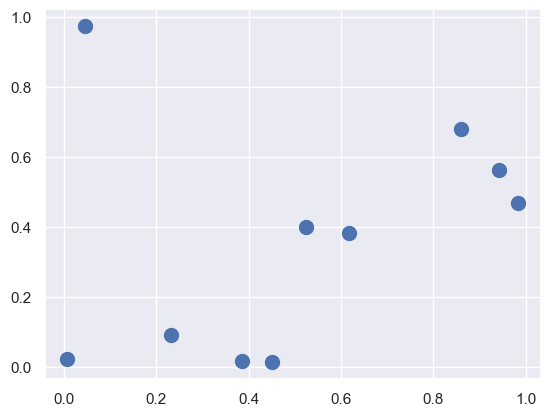

In [101]:
X = rand.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting (Computation on Arrays: Broadcasting) and aggregation (Aggregations: Min, Max, and Everything In Between) routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [102]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)


This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [103]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [104]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape


(10, 10, 2)

In [105]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [106]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [108]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest k
 neighbors, all we need is to partition each row so that the smallest k+1
 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function:

In [109]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)


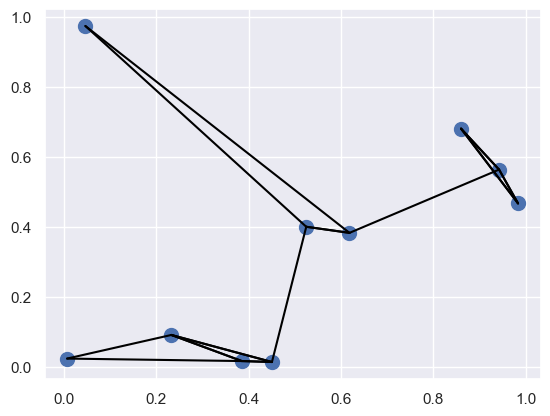

In [110]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Each point in the plot has lines drawn to its two nearest neighbors. At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as O[NlogN]
 or better rather than the O[N2]
 of the brute-force algorithm. One example of this is the KD-Tree, implemented in Scikit-learn.

### Structured Data: NumPy's Structured Arrays


In [111]:
import numpy as np


Imagine that we have several categories of data on a number of people (say, name, age, and weight), and we'd like to store these values for use in a Python program. It would be possible to store these in three separate arrays:

In [112]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

But this is a bit clumsy. There's nothing here that tells us that the three arrays are related; it would be more natural if we could use a single structure to store all of this data. NumPy can handle this through structured arrays, which are arrays with compound data types.

Recall that previously we created a simple array using an expression like this:

In [113]:
x = np.zeros(4, dtype=int)

In [114]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


Here 'U10' translates to "Unicode string of maximum length 10," 'i4' translates to "4-byte (i.e., 32 bit) integer," and 'f8' translates to "8-byte (i.e., 64 bit) float." We'll discuss other options for these type codes in the following section.

Now that we've created an empty container array, we can fill the array with our lists of values:

In [115]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


As we had hoped, the data is now arranged together in one convenient block of memory.

The handy thing with structured arrays is that you can now refer to values either by index or by name:

In [116]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

Using Boolean masking, this even allows you to do some more sophisticated operations such as filtering on age:

In [117]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

Note that if you'd like to do any operations that are any more complicated than these, you should probably consider the Pandas package, covered in the next chapter. As we'll see, Pandas provides a Dataframe object, which is a structure built on NumPy arrays that offers a variety of useful data manipulation functionality similar to what we've shown here, as well as much, much more.

### Creating Structured Arrays
Structured array data types can be specified in a number of ways. Earlier, we saw the dictionary method:

In [118]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [119]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [120]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

If the names of the types do not matter to you, you can specify the types alone in a comma-separated string:

In [121]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

The shortened string format codes may not be immediately intuitive, but they are built on simple principles.
The first (optional) character `<` or `>`, means "little endian" or "big endian," respectively, and specifies the ordering convention for significant bits.
The next character specifies the type of data: characters, bytes, ints, floating points, and so on (see the table below).
The last character or characters represent the size of the object in bytes.

| Character    | Description           | Example                           |
| ---------    | -----------           | -------                           | 
| `'b'`        | Byte                  | `np.dtype('b')`                   |
| `'i'`        | Signed integer        | `np.dtype('i4') == np.int32`      |
| `'u'`        | Unsigned integer      | `np.dtype('u1') == np.uint8`      |
| `'f'`        | Floating point        | `np.dtype('f8') == np.int64`      |
| `'c'`        | Complex floating point| `np.dtype('c16') == np.complex128`|
| `'S'`, `'a'` | String                | `np.dtype('S5')`                  |
| `'U'`        | Unicode string        | `np.dtype('U') == np.str_`        |
| `'V'`        | Raw data (void)       | `np.dtype('V') == np.void`        |

### More Advanced Compound Types
It is possible to define even more advanced compound types. For example, you can create a type where each element contains an array or matrix of values. Here, we'll create a data type with a mat component consisting of a 3×3
 floating-point matrix:



In [122]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Now each element in the X array consists of an id and a 3×3
 matrix. Why would you use this rather than a simple multidimensional array, or perhaps a Python dictionary? The reason is that this NumPy dtype directly maps onto a C structure definition, so the buffer containing the array content can be accessed directly within an appropriately written C program. If you find yourself writing a Python interface to a legacy C or Fortran library that manipulates structured data, you'll probably find structured arrays quite useful!



## RecordArrays: Structured Arrays with a Twist
NumPy also provides the np.recarray class, which is almost identical to the structured arrays just described, but with one additional feature: fields can be accessed as attributes rather than as dictionary keys. Recall that we previously accessed the ages by writing:

In [123]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [124]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

The downside is that for record arrays, there is some extra overhead involved in accessing the fields, even when using the same syntax. We can see this here:

In [125]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

116 ns ± 9.79 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
2.56 μs ± 1.02 μs per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
9.86 μs ± 2.25 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
